<a href="https://colab.research.google.com/github/paulraii/MIT504/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset

In [20]:
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

# Splitting the dataset

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
#Setting the classifier as 5
knn = KNeighborsClassifier(n_neighbors=5)

In [23]:
# Fitting the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

#Creating grid for visualization

In [24]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions for the meshgrid

In [25]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting

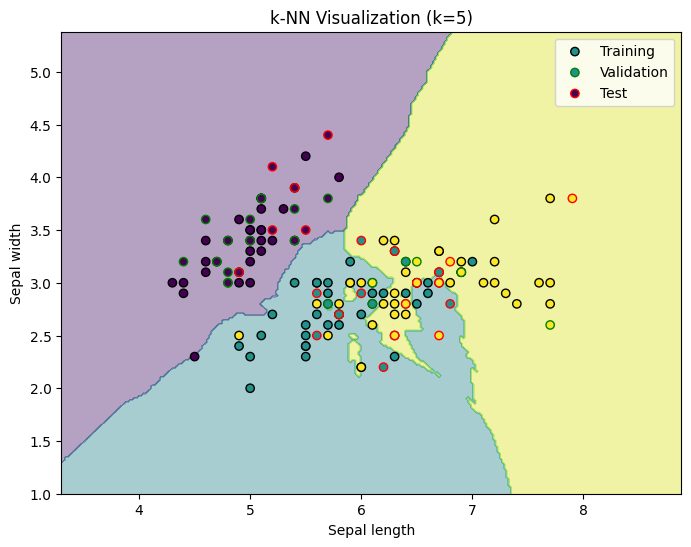

In [26]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Training')
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, edgecolors='g', label='Validation')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='r', label='Test')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('k-NN Visualization (k=5)')
plt.legend()
plt.show()